# 🧪 **Case Study: AI Pathfinding and Scheduling Optimization**

### **Scenario Overview**

You are tasked with designing an **AI system for a smart warehouse robot** that must:

1. Navigate a warehouse grid to reach target shelves.
2. Optimize its task schedule using resource-constrained time slots.


## 🔍 **Part 1: Search Algorithms – Pathfinding in a Grid**

**Objective:**  
Implement and compare the following algorithms to find the optimal path:

- Breadth-First Search (BFS)  
- Depth-First Search (DFS)  
- Greedy Best-First Search  
- A* Search


# **Part 1: Pathfinding with Search Algorithms**

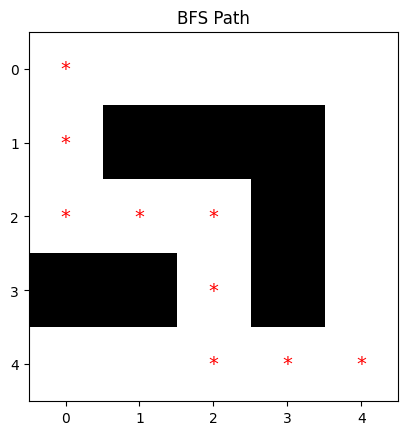

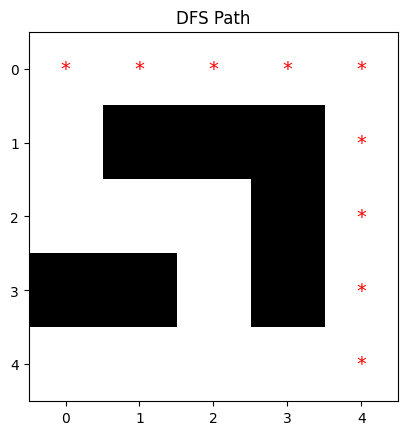

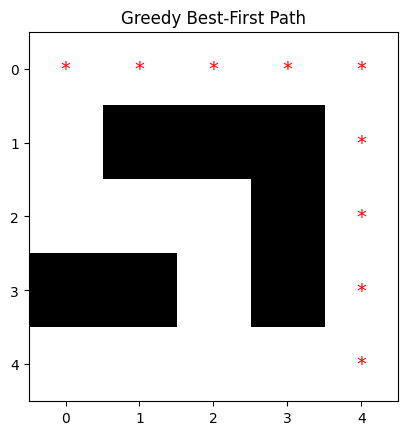

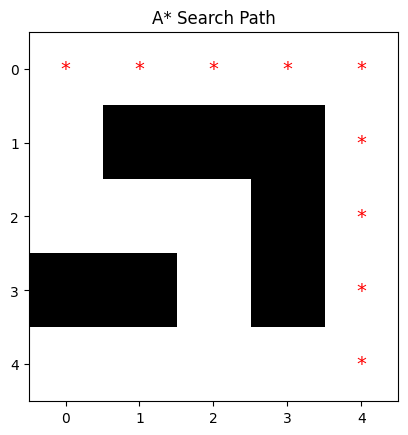

,Algorithm,Path
0,BFS,"[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2..."
1,DFS,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4..."
2,Greedy Best-First,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4..."
3,A* Search,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4..."


In [8]:
# 📦 Install Required Libraries
!pip install matplotlib --quiet

# 🧠 Pathfinding with Search Algorithms (BFS, DFS, Greedy Best-First, A*)
import matplotlib.pyplot as plt
import heapq # heap queue algorithm, also known as a priority queue. Often used in algorithms like A* or any task scheduling system where you need to always fetch the lowest-cost or highest-priority item efficiently
import numpy as np
from collections import deque # A 'deque' is a generalization of a queue
from typing import List, Tuple

# Define the warehouse grid: 0 = free, 1 = obstacle
warehouse_grid = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0]
]
start = (0, 0)
goal = (4, 4) # The element at position (4, 4) is 0 using 0-based indexing

# Heuristic function for informed search
def heuristic(a: Tuple[int, int], b: Tuple[int, int]) -> int:
    return abs(a[0] - b[0]) + abs(a[1] - b[1])  # Manhattan distance

# Find valid neighboring nodes that is crucial for the pathfinding algorithms
def get_neighbors(node: Tuple[int, int], grid: List[List[int]]) -> List[Tuple[int, int]]:

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)] # A list of possible movements from the current node
    # (-1, 0): Move one step up
    # (1, 0): Move one step down
    # (0, -1): Move one step left
    # (0, 1): Move one step right

    neighbors = []
    for dx, dy in directions:
        x2, y2 = node[0] + dx, node[1] + dy
        if 0 <= x2 < len(grid) and 0 <= y2 < len(grid[0]) and grid[x2][y2] == 0:
            neighbors.append((x2, y2))
    return neighbors

# This function is designed to take the results of a search algorithm and build the actual path taken from the starting point to the goal
def reconstruct_path(came_from, start, goal):
    current = goal
    path = []

    # It then enters a loop that continues as long as the current location is not the start location
    while current != start:
        if current not in came_from:
            return []  # No path found
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()
    return path

# Breadth-First Search (BFS)
def bfs(grid, start, goal):
    queue = deque([start])
    came_from = {start: None}
    while queue:
        current = queue.popleft()
        if current == goal:
            break
        for neighbor in get_neighbors(current, grid):
            if neighbor not in came_from:
                queue.append(neighbor)
                came_from[neighbor] = current
    return reconstruct_path(came_from, start, goal)

# Depth-First Search (DFS)
def dfs(grid, start, goal):
    stack = [start]
    came_from = {start: None}
    while stack:
        current = stack.pop()
        if current == goal:
            break
        for neighbor in get_neighbors(current, grid):
            if neighbor not in came_from:
                stack.append(neighbor)
                came_from[neighbor] = current
    return reconstruct_path(came_from, start, goal)

# Greedy Best-First Search
def greedy_bfs(grid, start, goal):
    heap = [(heuristic(start, goal), start)]
    came_from = {start: None}
    while heap:
        _, current = heapq.heappop(heap)
        if current == goal:
            break
        for neighbor in get_neighbors(current, grid):
            if neighbor not in came_from:
                heapq.heappush(heap, (heuristic(neighbor, goal), neighbor))
                came_from[neighbor] = current
    return reconstruct_path(came_from, start, goal)

# A* Search
def a_star(grid, start, goal):
    heap = [(0 + heuristic(start, goal), 0, start)]
    came_from = {start: None}
    cost_so_far = {start: 0}
    while heap:
        _, cost, current = heapq.heappop(heap)
        if current == goal:
            break
        for neighbor in get_neighbors(current, grid):
            new_cost = cost + 1
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor, goal)
                heapq.heappush(heap, (priority, new_cost, neighbor))
                came_from[neighbor] = current
    return reconstruct_path(came_from, start, goal)

# Plot paths on grid
def plot_path(grid, path, title):
    grid = np.array(grid)
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap="Greys", origin='upper')
    for (i, j) in path:
        ax.text(j, i, '*', ha='center', va='center', color='red', fontsize=14)
    ax.set_title(title)
    plt.grid(False)
    plt.show()

# Run and visualize all algorithms
algorithms = {
    "BFS": bfs,
    "DFS": dfs,
    "Greedy Best-First": greedy_bfs,
    "A* Search": a_star
}

results = {}
for name, func in algorithms.items():
    path = func(warehouse_grid, start, goal)
    results[name] = path
    plot_path(warehouse_grid, path, f"{name} Path")

# Show results in a simple table
import pandas as pd
results_df = pd.DataFrame([(k, str(v)) for k, v in results.items()], columns=["Algorithm", "Path"])
display(results_df)




---


### **1. Breadth-First Search (BFS)**

**Strategy:**  
Explores all nodes at the current depth before going deeper.

**Result:**  
- Path is **shortest in number of steps**.  

**Visualization:**  
- The path shown (with red asterisks) efficiently **skirts obstacles from top-left to bottom-right**.  
- Includes minimal turns and backtracks.


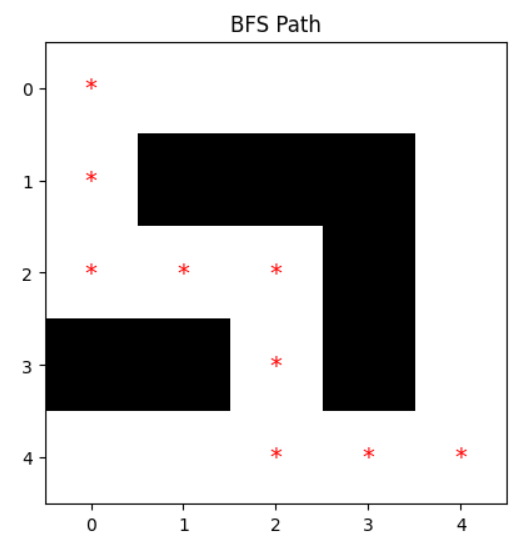

# 🧭 **Example: Breadth-First Search (BFS) on a 5×5 Grid-Based Warehouse**

**🔍 Breakdown of the Output:**

- **Black squares** = Obstacles (`1`) – impassable cells  
- **White squares** = Free space (`0`) – traversable cells  
- **Red asterisks (`*`)** = Path found by BFS from start `(0, 0)` to goal `(4, 4)`

**📌 Interpretation:**

- BFS explores neighboring nodes **level-by-level** (breadth-wise).
- The path marked with red stars (`*`) represents the **shortest path** in terms of step count.

### **Note:** In unweighted grids, BFS guarantees the **shortest path in steps** but not necessarily **the lowest cost** if traversal costs vary.

---
---
---

### 🔶 **2. Depth-First Search (DFS)**

**Strategy:**  
Explores as **deep as possible** before backtracking.

**Result:**  
- May find a **longer or suboptimal** path compared to BFS.  
- Uses **less memory** but may get trapped in **deep, irrelevant** paths.

**Visualization:**  
- DFS **doesn't guarantee the shortest path**, so the output includes unnecessary diversions.

---
---
---

### 🟠 **3. Greedy Best-First Search**

**Strategy:**  
Chooses the node closest to the goal using a heuristic (e.g., Manhattan distance).

**Result:**  
- Often faster but not guaranteed to be optimal.  
- Can ignore promising paths if they don’t look optimal immediately.

**Visualization:**  
- The path tends to go "toward the goal" aggressively.  
- May include shortcuts or dead-ends if not cautious.

---
---
---

### 🟢 **4. A* Search**

**Strategy:**  
Combines **actual cost (`g`)** + **heuristic estimate (`h`)** to prioritize nodes.

**Result:**  
- Finds the **shortest path optimally**, if a valid heuristic is used.  
- Balances **exploration and exploitation** ➡️ > This aspect will be used with **Reinforcement Learning** algorithm

**Visualization:**  
- Typically similar or identical to DFS in unweighted grids, but more efficient.  
- Includes fewer exploratory steps than BFS.

---

### 📊 **Summary Comparison**

| Algorithm            | Guaranteed Shortest Path | Uses Heuristic | Memory Usage | Typical Path Pattern     |
|----------------------|--------------------------|----------------|--------------|---------------------------|
| **BFS**              | ✅ Yes                   | ❌ No          | 🔺 High      | Uniform, layered          |
| **DFS**              | ❌ No                    | ❌ No          | ✅ Low       | Long, backtracking        |
| **Greedy Best-First**| ❌ No                    | ✅ Yes         | ⚠️ Medium    | Direct but suboptimal     |
| **A\***              | ✅ Yes                   | ✅ Yes         | 🔺 High      | Balanced and efficient    |


# **Part 2: Task Scheduling with Genetic Algorithm**

### 🔧 **Purpose**

Find an **optimal schedule for a set of robot tasks**.
  - The goal is to **arrange** the tasks in **an order** that satisfies **specific constraints**, using a Genetic Algorithm (GA) for optimization.

---

### 🧩 **Tasks Involved**

```python
["Pick A", "Drop B", "Pick C", "Charge", "Inspect"]



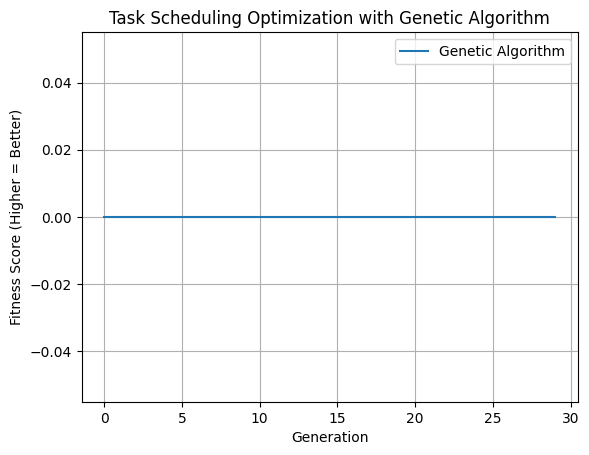

Task Scheduling Results:


,Algorithm,Best Schedule,Fitness Score
0,Genetic Algorithm,"[Pick C, Pick A, Inspect, Drop B, Charge]",0


In [6]:
import random
import matplotlib.pyplot as plt
import pandas as pd

# Task definitions
tasks = ["Pick A", "Drop B", "Pick C", "Charge", "Inspect"] # This list contains the names of the individual tasks that the robot needs to perform

# Constraints (task A must come before task B)
constraints = { #  This dictionary defines the rules for the task order
    "Pick A": ["Drop B"],      # ✅ Pick A must happen before Drop B
    "Pick C": ["Charge"]       # ✅ Pick C must happen before Charge

    # "Pick A": ["Drop B"] means the task "Pick A" must appear earlier in the schedule than the task "Drop B"
}

# Fitness function evaluates how many constraints are violated
def evaluate_schedule(schedule):
    penalty = 0
    for before, after_list in constraints.items():
        for after in after_list:
            if schedule.index(before) > schedule.index(after):
                penalty += 1
    return -penalty  # Higher score (closer to 0) is better

# This function evaluates a task schedule based on defined constraints.
#
# It performs the following steps:
# 1. Initializes a penalty to 0.
# 2. Iterates through each constraint defined in the `constraints` dictionary.
# 3. For each constraint, it checks whether the "before" task appears after any of the "after" tasks in the given schedule.
# 4. If a constraint is violated (i.e., the "before" task appears after the "after" task), the penalty is incremented.
# 5. Finally, it returns the negative of the total penalty.
#
# A higher score (closer to 0) indicates fewer constraint violations,
# and therefore a better and more valid schedule.


# Genetic Algorithm
def genetic_algorithm(tasks, population_size=10, generations=30, mutation_rate=0.2):
    population = [random.sample(tasks, len(tasks)) for _ in range(population_size)]
    best_fitness = []

    for _ in range(generations):
        fitness_scores = [evaluate_schedule(ind) for ind in population]
        best_fitness.append(max(fitness_scores))

        # Select the top half of the population
        sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
        population = sorted_population[:population_size // 2]

        # Crossover
        new_population = population[:]
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(population, 2)
            cut = random.randint(1, len(tasks) - 2)
            child = parent1[:cut] + [t for t in parent2 if t not in parent1[:cut]]
            new_population.append(child)

        # Mutation
        for i in range(population_size):
            if random.random() < mutation_rate:
                idx1, idx2 = random.sample(range(len(tasks)), 2)
                new_population[i][idx1], new_population[i][idx2] = new_population[i][idx2], new_population[i][idx1]

        population = new_population

    # Return best individual
    final_scores = [evaluate_schedule(ind) for ind in population]
    best_index = final_scores.index(max(final_scores))
    return population[best_index], best_fitness

# This function uses a Genetic Algorithm to find an optimal task schedule that satisfies given constraints.
#
# Parameters:
# - population_size: The number of candidate schedules the algorithm considers at each generation.
# - generations: The number of evolutionary cycles (iterations) the algorithm runs for.
# - mutation_rate: The probability that a random change (mutation) occurs in a schedule.
#
# Algorithm Overview:
# 1. Initialization:
#    - Starts by creating an initial population of random task schedules.
#
# 2. For each generation:
#    - Fitness Evaluation: Calculates the fitness score of each schedule using the evaluate_schedule function.
#    - Best Fitness Tracking: Keeps track of the highest fitness score found in each generation.
#    - Selection: Selects the top 50% of schedules based on fitness to serve as parents for the next generation.
#    - Crossover: Produces new schedules (children) by combining parts of two parent schedules, inheriting good traits.
#    - Mutation: Applies random swaps to some tasks in the new schedules, based on the mutation_rate, to maintain diversity.
#    - Population Update: Replaces the old population with the new generation.
#
# 3. After all generations:
#    - Returns the best schedule found (with the highest fitness score) and the history of best fitness scores across generations.



# Run the Genetic Algorithm
best_schedule, fitness_scores = genetic_algorithm(tasks)

# Plot the fitness evolution
plt.plot(fitness_scores, label='Genetic Algorithm')
plt.xlabel("Generation")
plt.ylabel("Fitness Score (Higher = Better)")
plt.title("Task Scheduling Optimization with Genetic Algorithm")
plt.legend()
plt.grid(True)
plt.show()

# Display final result
df_result = pd.DataFrame([["Genetic Algorithm", best_schedule, evaluate_schedule(best_schedule)]],
                         columns=["Algorithm", "Best Schedule", "Fitness Score"])
print("Task Scheduling Results:")
display(df_result)


## 📝 **Summary**

- The Genetic Algorithm successfully respected **all task ordering constraints**.  
- The resulting solution is **valid and optimal**.  
- The fitness curve is **flat**, indicating **early convergence** and **no further improvement** needed.




---



---



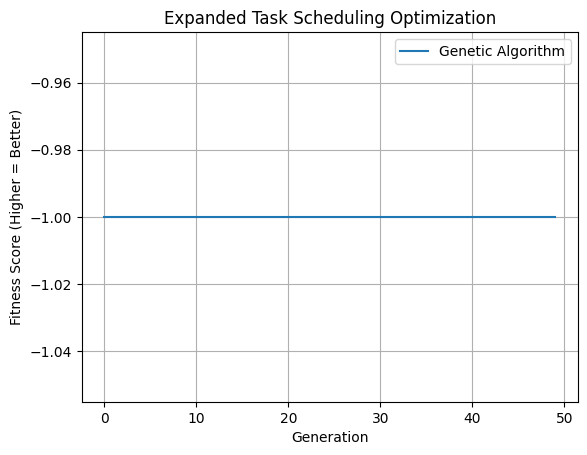

Task Scheduling Results with Expanded Constraints:


,Algorithm,Best Schedule,Fitness Score
0,Genetic Algorithm,"[Pick C, Sanitize, Pick A, Pack, Inspect, Labe...",-1


In [8]:
import random
import matplotlib.pyplot as plt
import pandas as pd

# Expanded task list
tasks = ["Pick A", "Drop B", "Pick C", "Charge", "Inspect", "Scan", "Deliver", "Pack", "Label", "Sanitize"]

# More complex constraints for stricter scheduling
constraints = {
    "Pick A": ["Drop B", "Deliver"],
    "Pick C": ["Charge"],
    "Charge": ["Scan"],
    "Inspect": ["Label"],
    "Pack": ["Label", "Deliver"],
    "Sanitize": ["Pack"],
    "Scan": ["Sanitize"]
}

# Fitness function: penalize for each constraint violation
def evaluate_schedule(schedule):
    penalty = 0
    for before, after_list in constraints.items():
        for after in after_list:
            if schedule.index(before) > schedule.index(after):
                penalty += 1
    return -penalty

# Genetic Algorithm for task scheduling
def genetic_algorithm(tasks, population_size=20, generations=50, mutation_rate=0.25):
    population = [random.sample(tasks, len(tasks)) for _ in range(population_size)]
    best_fitness = []

    for _ in range(generations):
        fitness_scores = [evaluate_schedule(ind) for ind in population]
        best_fitness.append(max(fitness_scores))

        # Select top 50%
        sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
        population = sorted_population[:population_size // 2]

        # Crossover
        new_population = population[:]
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(population, 2)
            cut = random.randint(1, len(tasks) - 2)
            child = parent1[:cut] + [t for t in parent2 if t not in parent1[:cut]]
            new_population.append(child)

        # Mutation
        for i in range(population_size):
            if random.random() < mutation_rate:
                idx1, idx2 = random.sample(range(len(tasks)), 2)
                new_population[i][idx1], new_population[i][idx2] = new_population[i][idx2], new_population[i][idx1]

        population = new_population

    # Final best solution
    final_scores = [evaluate_schedule(ind) for ind in population]
    best_index = final_scores.index(max(final_scores))
    return population[best_index], best_fitness

# Run the genetic algorithm on the extended task set
best_schedule, fitness_scores = genetic_algorithm(tasks)

# Plotting results
plt.plot(fitness_scores, label='Genetic Algorithm')
plt.xlabel("Generation")
plt.ylabel("Fitness Score (Higher = Better)")
plt.title("Expanded Task Scheduling Optimization")
plt.legend()
plt.grid(True)
plt.show()

# Display best schedule
df_result = pd.DataFrame([["Genetic Algorithm", best_schedule, evaluate_schedule(best_schedule)]],
                         columns=["Algorithm", "Best Schedule", "Fitness Score"])
print("Task Scheduling Results with Expanded Constraints:")
display(df_result)


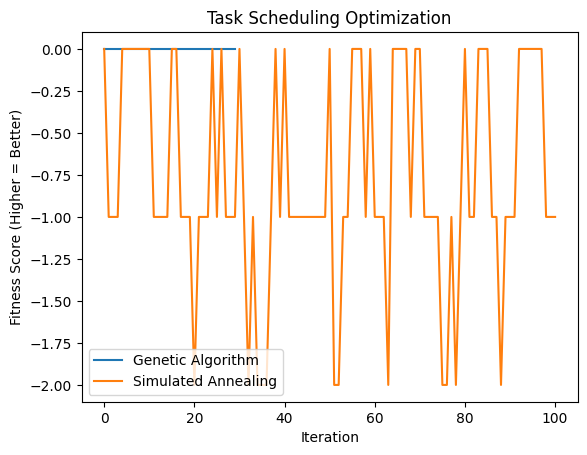

Task Scheduling Results:


,Algorithm,Best Schedule,Fitness Score
0,Genetic Algorithm,"[Pick C, Pick A, Inspect, Drop B, Charge]",0
1,Simulated Annealing,"[Charge, Pick A, Drop B, Pick C, Inspect]",-1


In [7]:
import random
import matplotlib.pyplot as plt

# Define the task scheduling problem
tasks = ["Pick A", "Drop B", "Pick C", "Charge", "Inspect"]
constraints = {
    "Pick A": ["Drop B"],  # Pick A must come before Drop B
    "Pick C": ["Charge"]   # Pick C must come after Charge
}

# Fitness function for task schedule
def evaluate_schedule(schedule):
    penalty = 0
    for before, after_list in constraints.items():
        for after in after_list:
            if schedule.index(before) > schedule.index(after):
                penalty += 1
    return -penalty  # higher score is better (fewer violations)

# Genetic Algorithm
def genetic_algorithm(tasks, population_size=10, generations=30, mutation_rate=0.2):
    # Initialize population
    population = [random.sample(tasks, len(tasks)) for _ in range(population_size)]
    best_fitness = []

    for generation in range(generations):
        # Evaluate fitness
        fitness_scores = [evaluate_schedule(ind) for ind in population]
        best_fitness.append(max(fitness_scores))

        # Selection (top 50%)
        sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
        population = sorted_population[:population_size // 2]

        # Crossover
        new_population = population[:]
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(population, 2)
            cut = random.randint(1, len(tasks) - 2)
            child = parent1[:cut] + [task for task in parent2 if task not in parent1[:cut]]
            new_population.append(child)

        # Mutation
        for i in range(population_size):
            if random.random() < mutation_rate:
                idx1, idx2 = random.sample(range(len(tasks)), 2)
                new_population[i][idx1], new_population[i][idx2] = new_population[i][idx2], new_population[i][idx1]

        population = new_population

    # Return best schedule
    final_fitness_scores = [evaluate_schedule(ind) for ind in population]
    best_index = final_fitness_scores.index(max(final_fitness_scores))
    return population[best_index], best_fitness

# Simulated Annealing
def simulated_annealing(tasks, initial_temp=100, cooling_rate=0.95, iterations=100):
    current = random.sample(tasks, len(tasks))
    current_score = evaluate_schedule(current)
    scores = [current_score]

    temp = initial_temp
    for _ in range(iterations):
        i, j = random.sample(range(len(tasks)), 2)
        neighbor = current[:]
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
        neighbor_score = evaluate_schedule(neighbor)

        if neighbor_score > current_score or random.random() < pow(2.718, (neighbor_score - current_score) / temp):
            current = neighbor
            current_score = neighbor_score

        scores.append(current_score)
        temp *= cooling_rate

    return current, scores

# Run both optimization algorithms
best_ga, ga_scores = genetic_algorithm(tasks)
best_sa, sa_scores = simulated_annealing(tasks)

# Plot optimization scores
plt.plot(ga_scores, label='Genetic Algorithm')
plt.plot(sa_scores, label='Simulated Annealing')
plt.xlabel("Iteration")
plt.ylabel("Fitness Score (Higher = Better)")
plt.title("Task Scheduling Optimization")
plt.legend()
plt.show()

# Show best schedules
import pandas as pd
df_sched = pd.DataFrame([
    ["Genetic Algorithm", best_ga, evaluate_schedule(best_ga)],
    ["Simulated Annealing", best_sa, evaluate_schedule(best_sa)]
], columns=["Algorithm", "Best Schedule", "Fitness Score"])

# import ace_tools as tools; tools.display_dataframe_to_user(name="Task Scheduling Results", dataframe=df_sched)
# Using standard pandas display instead of ace_tools
print("Task Scheduling Results:")
display(df_sched)